<a href="https://colab.research.google.com/github/misheljoy/Projects/blob/main/Yulu_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

--2023-04-09 09:59:54--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.173, 108.157.172.183, 108.157.172.176, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘bike_sharing.csv?1642089089.4’

bike_sharing.csv?16 100%[===================>] 633.16K  --.-KB/s    in 0.1s    

2023-04-09 09:59:55 (5.24 MB/s) - ‘bike_sharing.csv?1642089089.4’ saved [648353/648353]



# Defining Problem statement
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market

The company wants to know:

1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

2. How well those variables describe the electric cycle demands

In [ ]:
# importing necessory modules for analysis
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import seaborn as sns



In [ ]:
# analysing content of data
yulu = pd.read_csv("bike_sharing.csv?1642089089")
yulu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# null value evaluation
yulu.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
type(yulu)

pandas.core.frame.DataFrame

In [ ]:
yulu.shape

(10886, 12)

In [ ]:
# converting the catergorical variable to objects to analysise the statistical summary
yulu.season =yulu.season.astype(str)
yulu.holiday =yulu.holiday.astype(str)
yulu.workingday =yulu.workingday.astype(str)
yulu.weather =yulu.weather.astype(str)

In [ ]:
# statistical summary
yulu.describe(include = "all")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886,10886,10886,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,4,2,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,4,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2734,10575,7412,7192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


Observations:

* The data set have 12 columns and 10886 rows
*   There are no null values in the given data set
*   Out of 12 columns, 7 are numerical data and 5 are categorical data
*   Most entries are done on working days and for weather condition 1.
*   For the holiday feature, very few data points are collected for the holiday

*   The median temperature is noted at 20.5 degrees Celsius, while 75% of the data has been recorded below 26.24 degrees Celsius. The average temperature is noted as 20.36 degrees Celsius
*  The median temperature is noted at 20.5 degrees Celsius, while 75% of the data has been recorded below 26.24 degrees Celsius. The average temperature is noted as 20.36 degrees Celsius

*  The median causal users of the Yulu is 17, while 75% of the users are 49. The average #casual user is 36.02. The maximum number of causal users is 367.

*   The median number of registered users for the Yulu is 118, while 75% of the users are 222. The average number of registered users is 155.552. The maximum number of registered users is 886. 11. The median number of counted (casual + registered) users for the Yulu is 145, while 75% of the users are 284. The average number of counted users is 191.574. The maximum number of counted users is 977


---








# Non-Graphical Analysis: Value counts and unique attributes

In [ ]:
#Analysis data of season column
d1 = pd.DataFrame(yulu['season'].value_counts(normalize=True).reset_index())
d1.columns = ["season","Percentage"]
d1["Percentage"] = d1["Percentage"]*100
d1

,season,Percentage
0,4,25.114826
1,2,25.105640
2,3,25.105640
3,1,24.673893


In [ ]:
#Analysis data of weather column
d2 = pd.DataFrame(yulu['weather'].value_counts(normalize=True).reset_index())
d2.columns = ["weather","Percentage"]
d2["Percentage"] = d2["Percentage"]*100
d2

,weather,Percentage
0,1,66.066507
1,2,26.033437
2,3,7.890869
3,4,0.009186


In [ ]:
#Analysis data of working day column
d3 = pd.DataFrame(yulu['workingday'].value_counts(normalize=True).reset_index())
d3.columns = ["workingday","Percentage"]
d3["Percentage"] = d3["Percentage"]*100
d3

,workingday,Percentage
0,1,68.087452
1,0,31.912548


In [ ]:
#Analysis data of holiday column
d4 = pd.DataFrame(yulu['holiday'].value_counts(normalize=True).reset_index())
d4.columns = ["holiday","Percentage"]
d4["Percentage"] = d4["Percentage"]*100
d4

,holiday,Percentage
0,0,97.14312
1,1,2.85688


In [ ]:
# Analysis of temp column
yulu['temp'].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [ ]:
# Analysis of atemp column
yulu['atemp'].describe()

count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64

In [ ]:
# Analysis of windspeed column
yulu['windspeed'].describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

In [ ]:
# Analysis of humidity column
yulu['humidity'].describe()

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

In [ ]:
# Analysis of casual column
yulu['casual'].describe()

count    10886.000000
mean        36.021955
std         49.960477
min          0.000000
25%          4.000000
50%         17.000000
75%         49.000000
max        367.000000
Name: casual, dtype: float64

In [ ]:
# Analysis of registered column
yulu['registered'].describe()

count    10886.000000
mean       155.552177
std        151.039033
min          0.000000
25%         36.000000
50%        118.000000
75%        222.000000
max        886.000000
Name: registered, dtype: float64

In [ ]:
# Analysis of count column
yulu['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

Observations:


*   The datapoints collected for all the seasons are roughly equal in proportion.
*   The majority of the data is collected for non-holidays, which makes sense as a lot of people on holiday might be using the service

* more than half of the data points are collected for the working day considering that a lot of people use public transportation on working days
*  Clear skies and Partly cloudy collects 66% of the data points are most when rentals have happend. Very few data
points are collected during light snow or light rain conditions. Probably a lot of people don't use the service during heavy rain or thunder storms, which makes absolute sense.
*   The average temperature was 20.23 degrees Celsius, with 20.5 happening 50% of the time.
The maximum temperature is recorded at 41, and the minimum temperature is recorded at 0.82 degrees Celsius.
*   The average feeling temperature was 23.65 degrees Celsius, with 24.24 happening 50% of the time.
The maximum felt temperature is recorded at 45.45, and the minimum temperature is recorded at 0.76 degrees Celsius.
*   The average humidity was 61.886%, with 62.8% of humidity happening 50% of the time
*  The average number of casual users is 36.02, with 17 causal users being 50%.
The maximum number of casual users is 367, and the minimum number of users is zero
*  The average number of counted users (causal + registered) is 191.57, with 145 customers 50% of the time.
The maximum and minimum number of total users are 977 and 1, respectively.










# Univariate Analysis

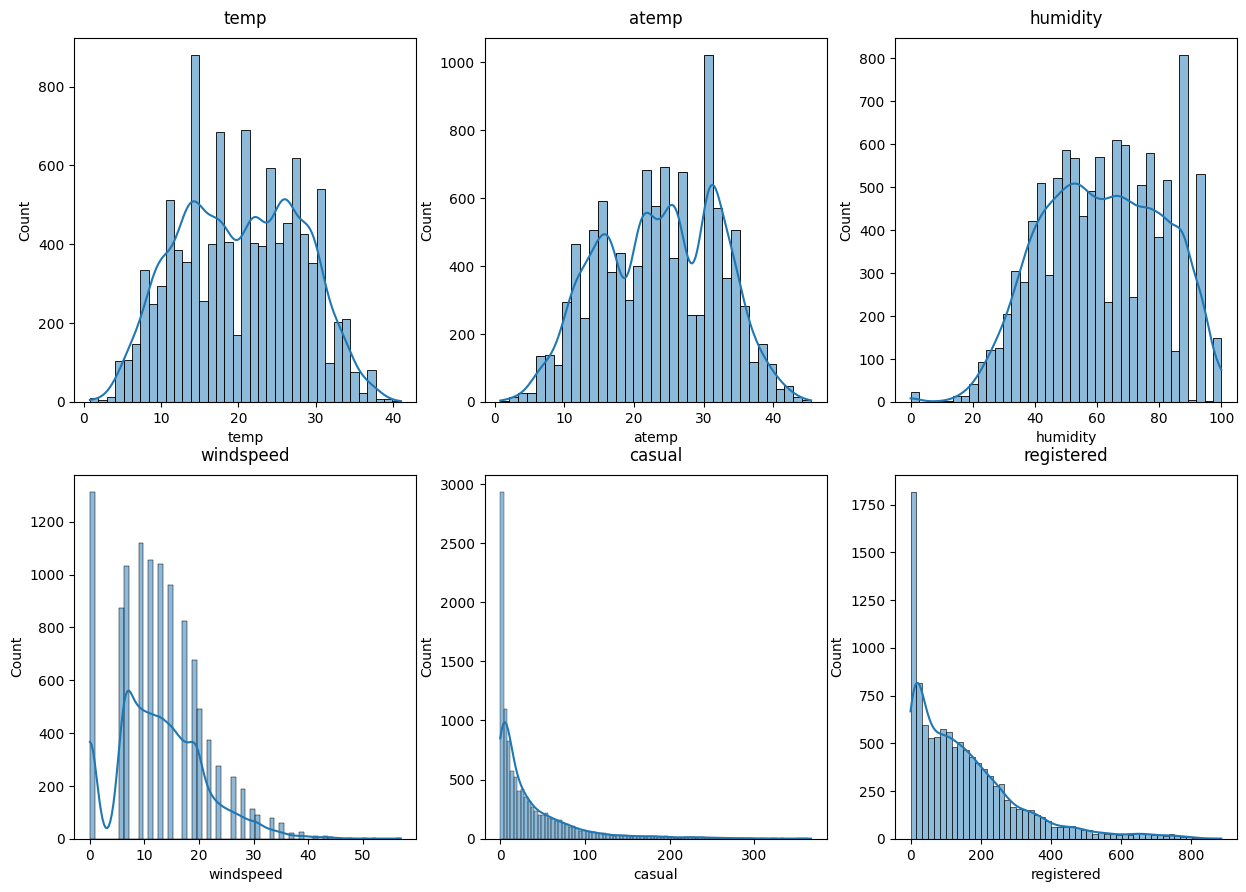

In [ ]:
#Univariate analysis of numerical fields
columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
fig.subplots_adjust(top=1)
value = 0
for i in range(2):
    for j in range(3):
        sns.histplot(yulu[columns[value]], ax=axis[i,j], kde=True)
        axis[i,j].set_title(f"{columns[value]}", pad=10)
        value += 1
plt.show()

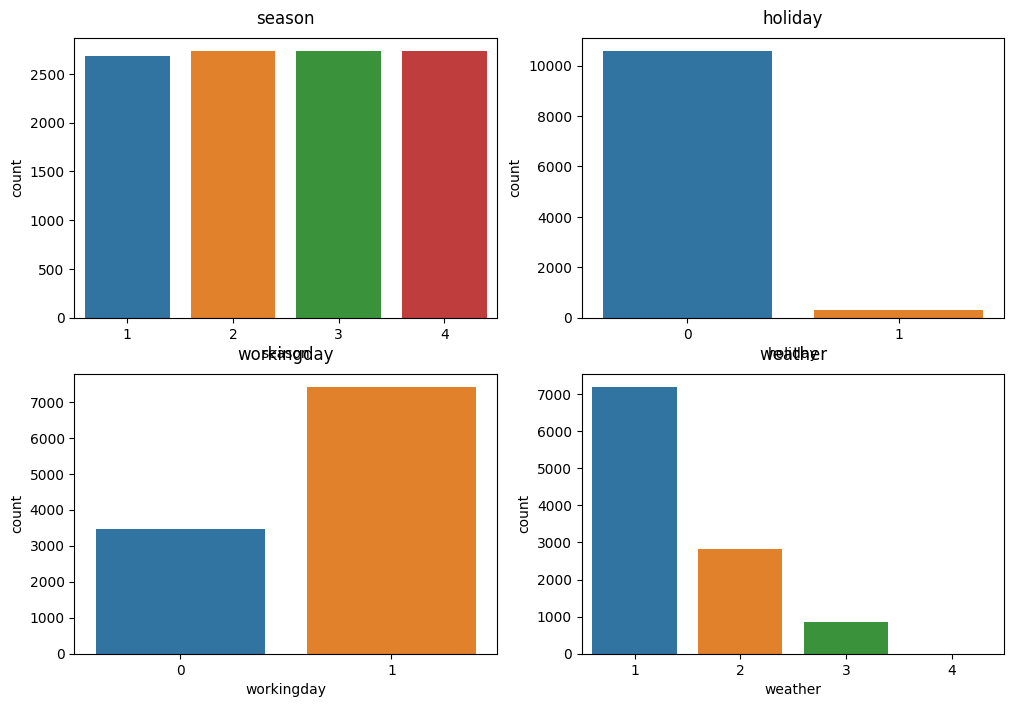

In [ ]:
# univariate analysis of  categorical column
columns= ['season', 'holiday', 'workingday', 'weather']
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
value = 0
for i in range(2):
    for j in range(2):
        sns.countplot(data=yulu, x=columns[value], ax=axis[i, j])
        axis[i,j].set_title(f"{columns[value]}", pad=10)
        value += 1
plt.show()

Observations:


*   Season: Season 3 sees the highest amount of cycles rented, followed by 2, 4 and 1.
*   Weather: Users mostly rent cycle during weather 1, followed by 2 and 3. Weather 4 was recorded only once in the period of 2 years.
*  Atemp: The average temperature while users rent cycles fall between 17 degrees to 31 degrees.
*  Humidity: Humidity generally is between 47 and 77, with some outliers at 0.
*  Windspeed: The 25 percentile to 75 percentile windspeed is between 7km/he and 17km/hr.
*  Casual: average count of casual users on a hourly basis is 36 users. maximum casual users recorded in an hour is 367 and minimum is 0.
*  Registered: average count of registered users on an hourly basis is 155 users. maximum registered users in an hour is 886 and minimum is zero.




# Outlier Detection

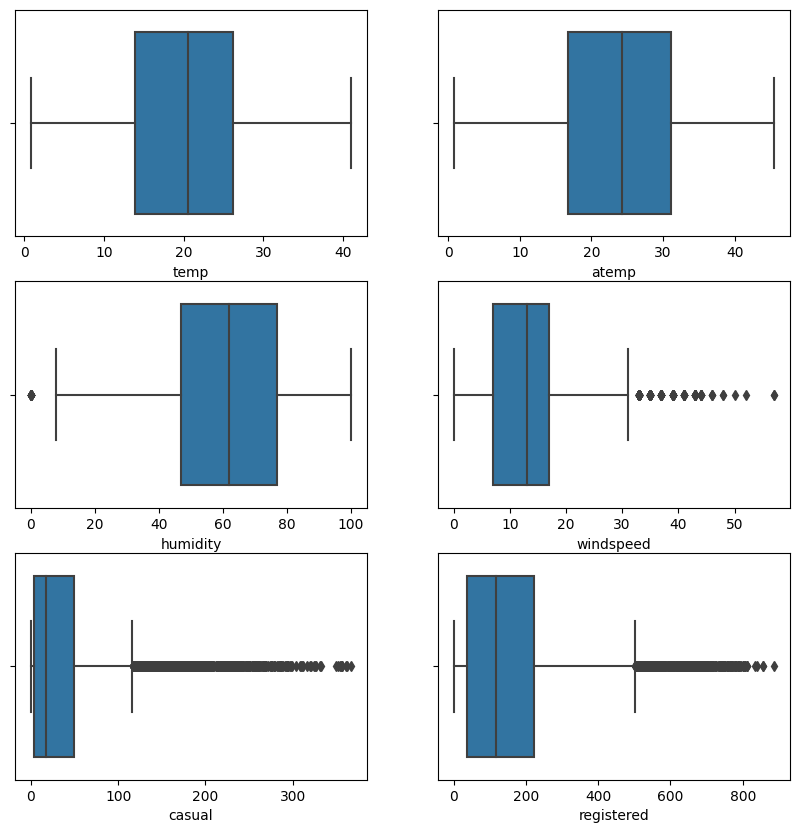

In [ ]:

coloumns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
value = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(x=yulu[coloumns[value]], ax=axis[i, j])
        value += 1
plt.show()

Observation:
*  the casual and registered user colums have more outlier than the rest of the columns.



# Bivariate Analysis

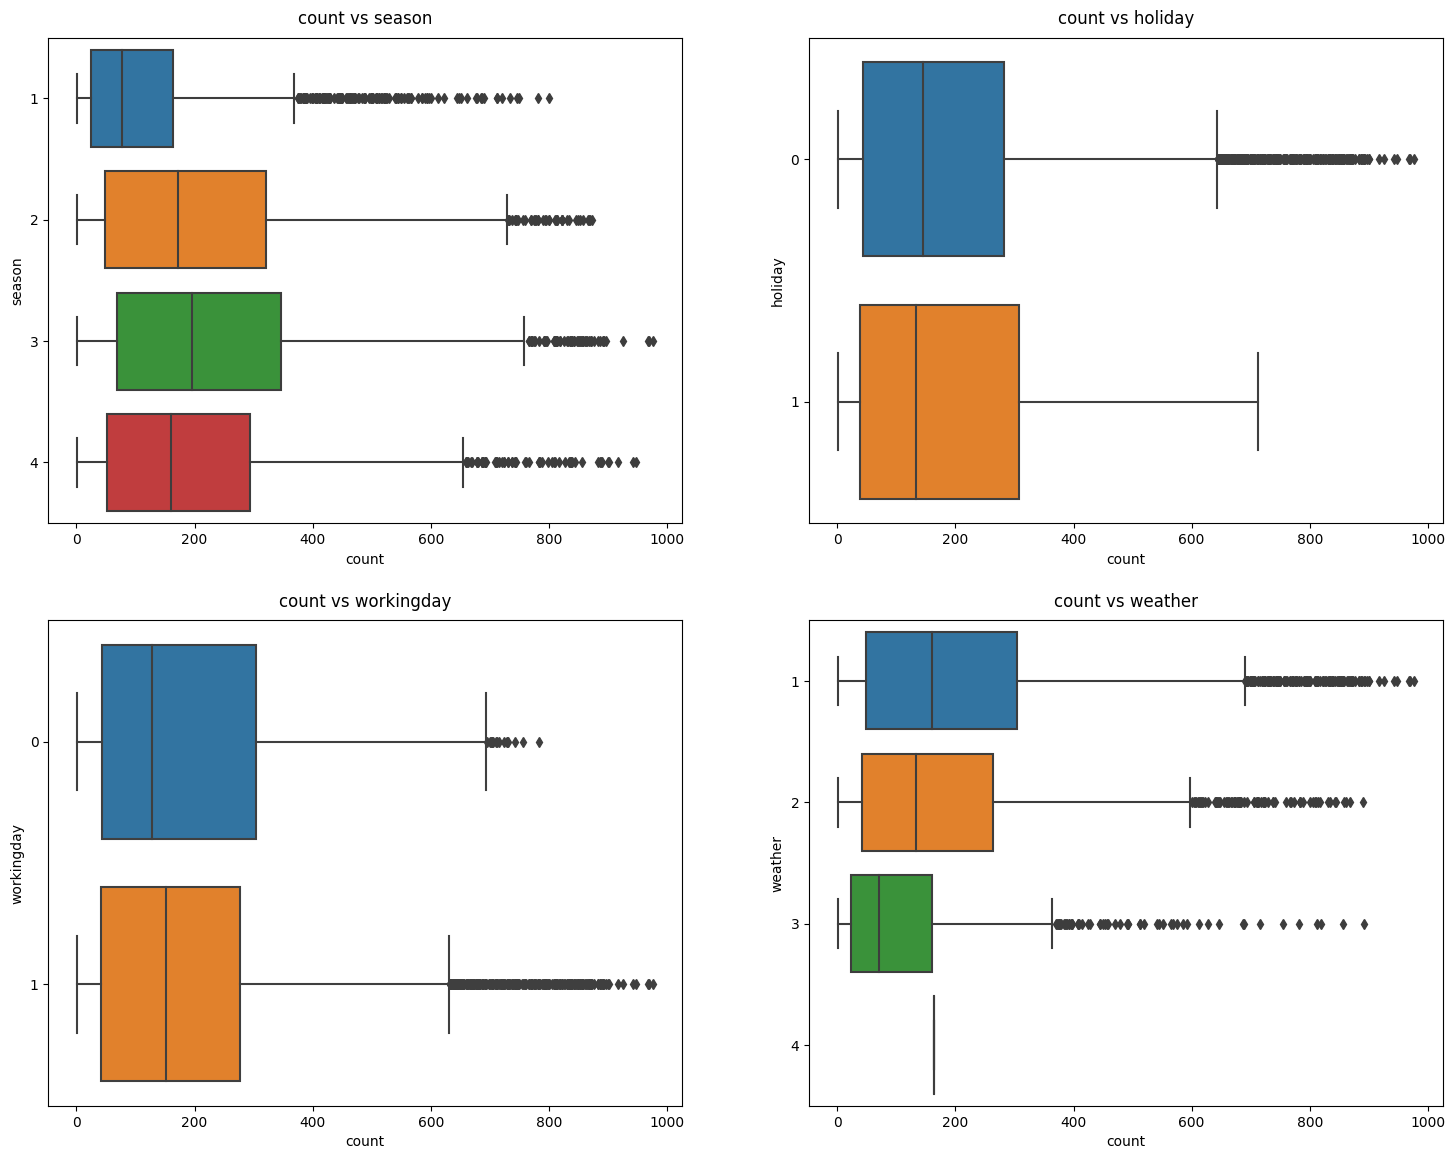

In [ ]:
# count dependence on categorical variable
columns = ['season', 'holiday', 'workingday', 'weather']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1)
value = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=yulu, x='count', y=columns[value], ax=axs[i,j])
        axs[i,j].set_title(f"count vs {columns[value]}", pad=10)
        value += 1

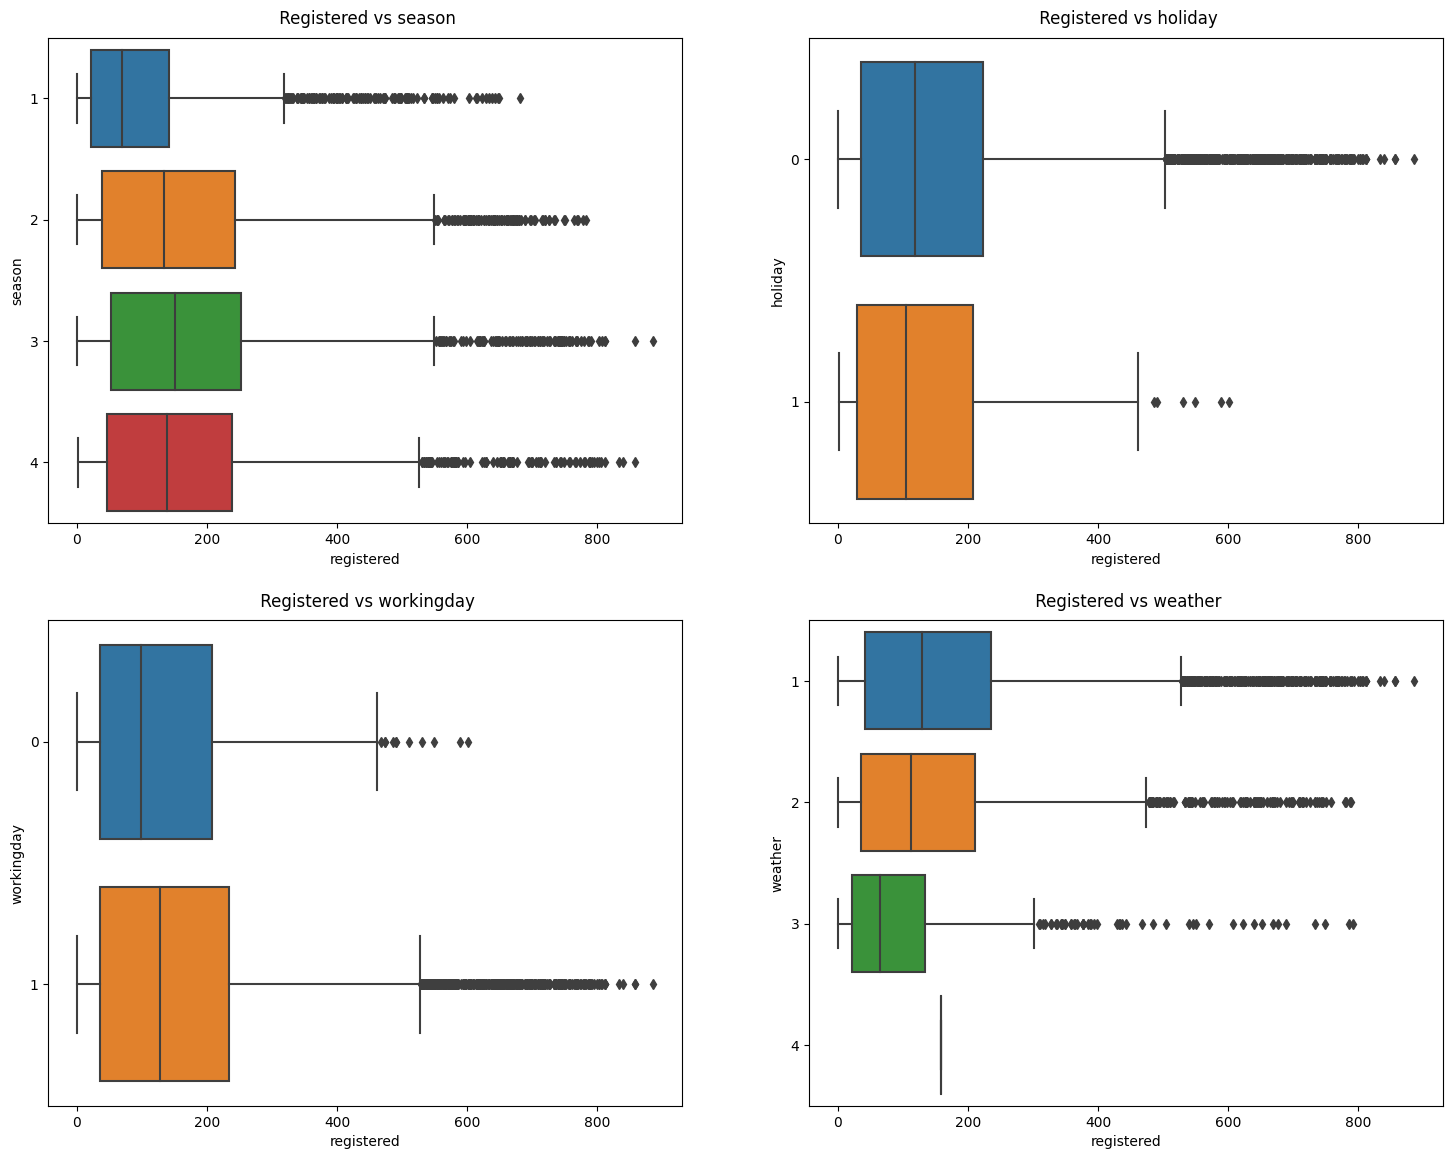

In [ ]:
# registered user count dependence on categorical variable
columns = ['season', 'holiday', 'workingday', 'weather']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1)
value = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=yulu, x='registered', y=columns[value], ax=axs[i,j])
        axs[i,j].set_title(f" Registered vs {columns[value]}", pad=10)
        value += 1

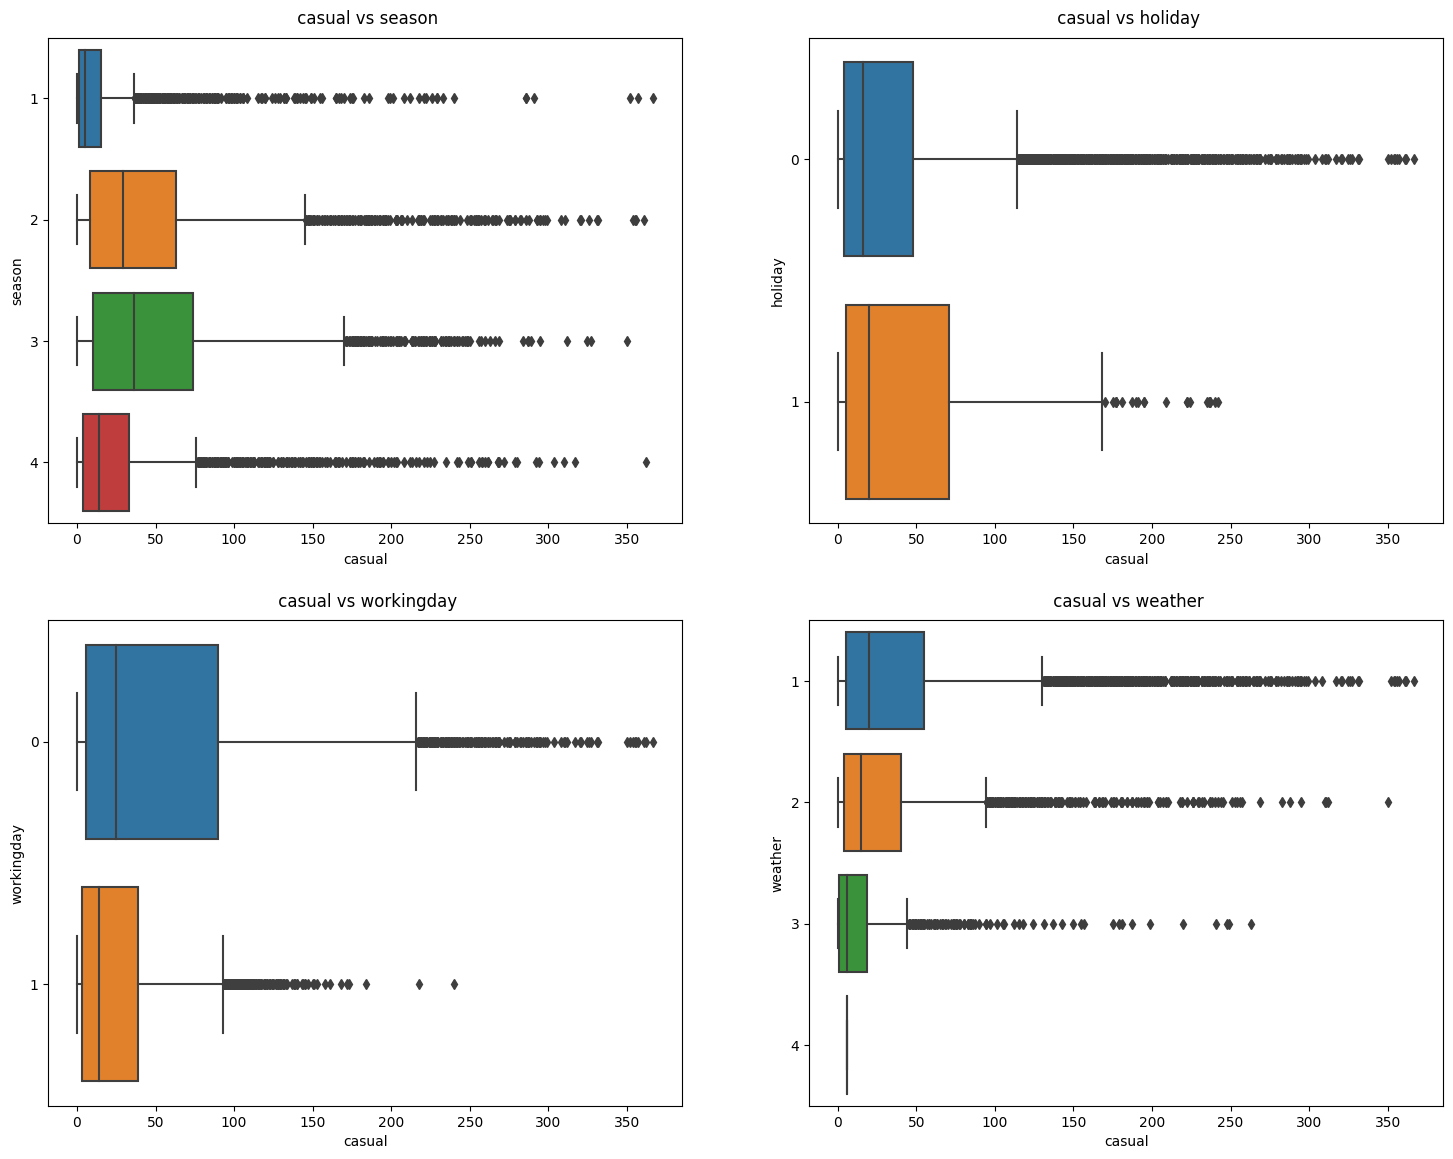

In [ ]:
# Casual user count dependence on categorical variable
columns = ['season', 'holiday', 'workingday', 'weather']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1)
value = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=yulu, x='casual', y=columns[value], ax=axs[i,j])
        axs[i,j].set_title(f" casual vs {columns[value]}", pad=10)
        value += 1

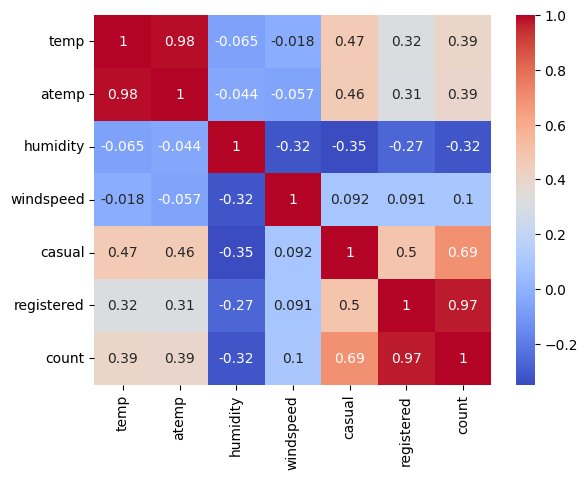

In [ ]:
sns.heatmap(yulu.corr(),annot = True,cmap ="coolwarm")
plt.show()

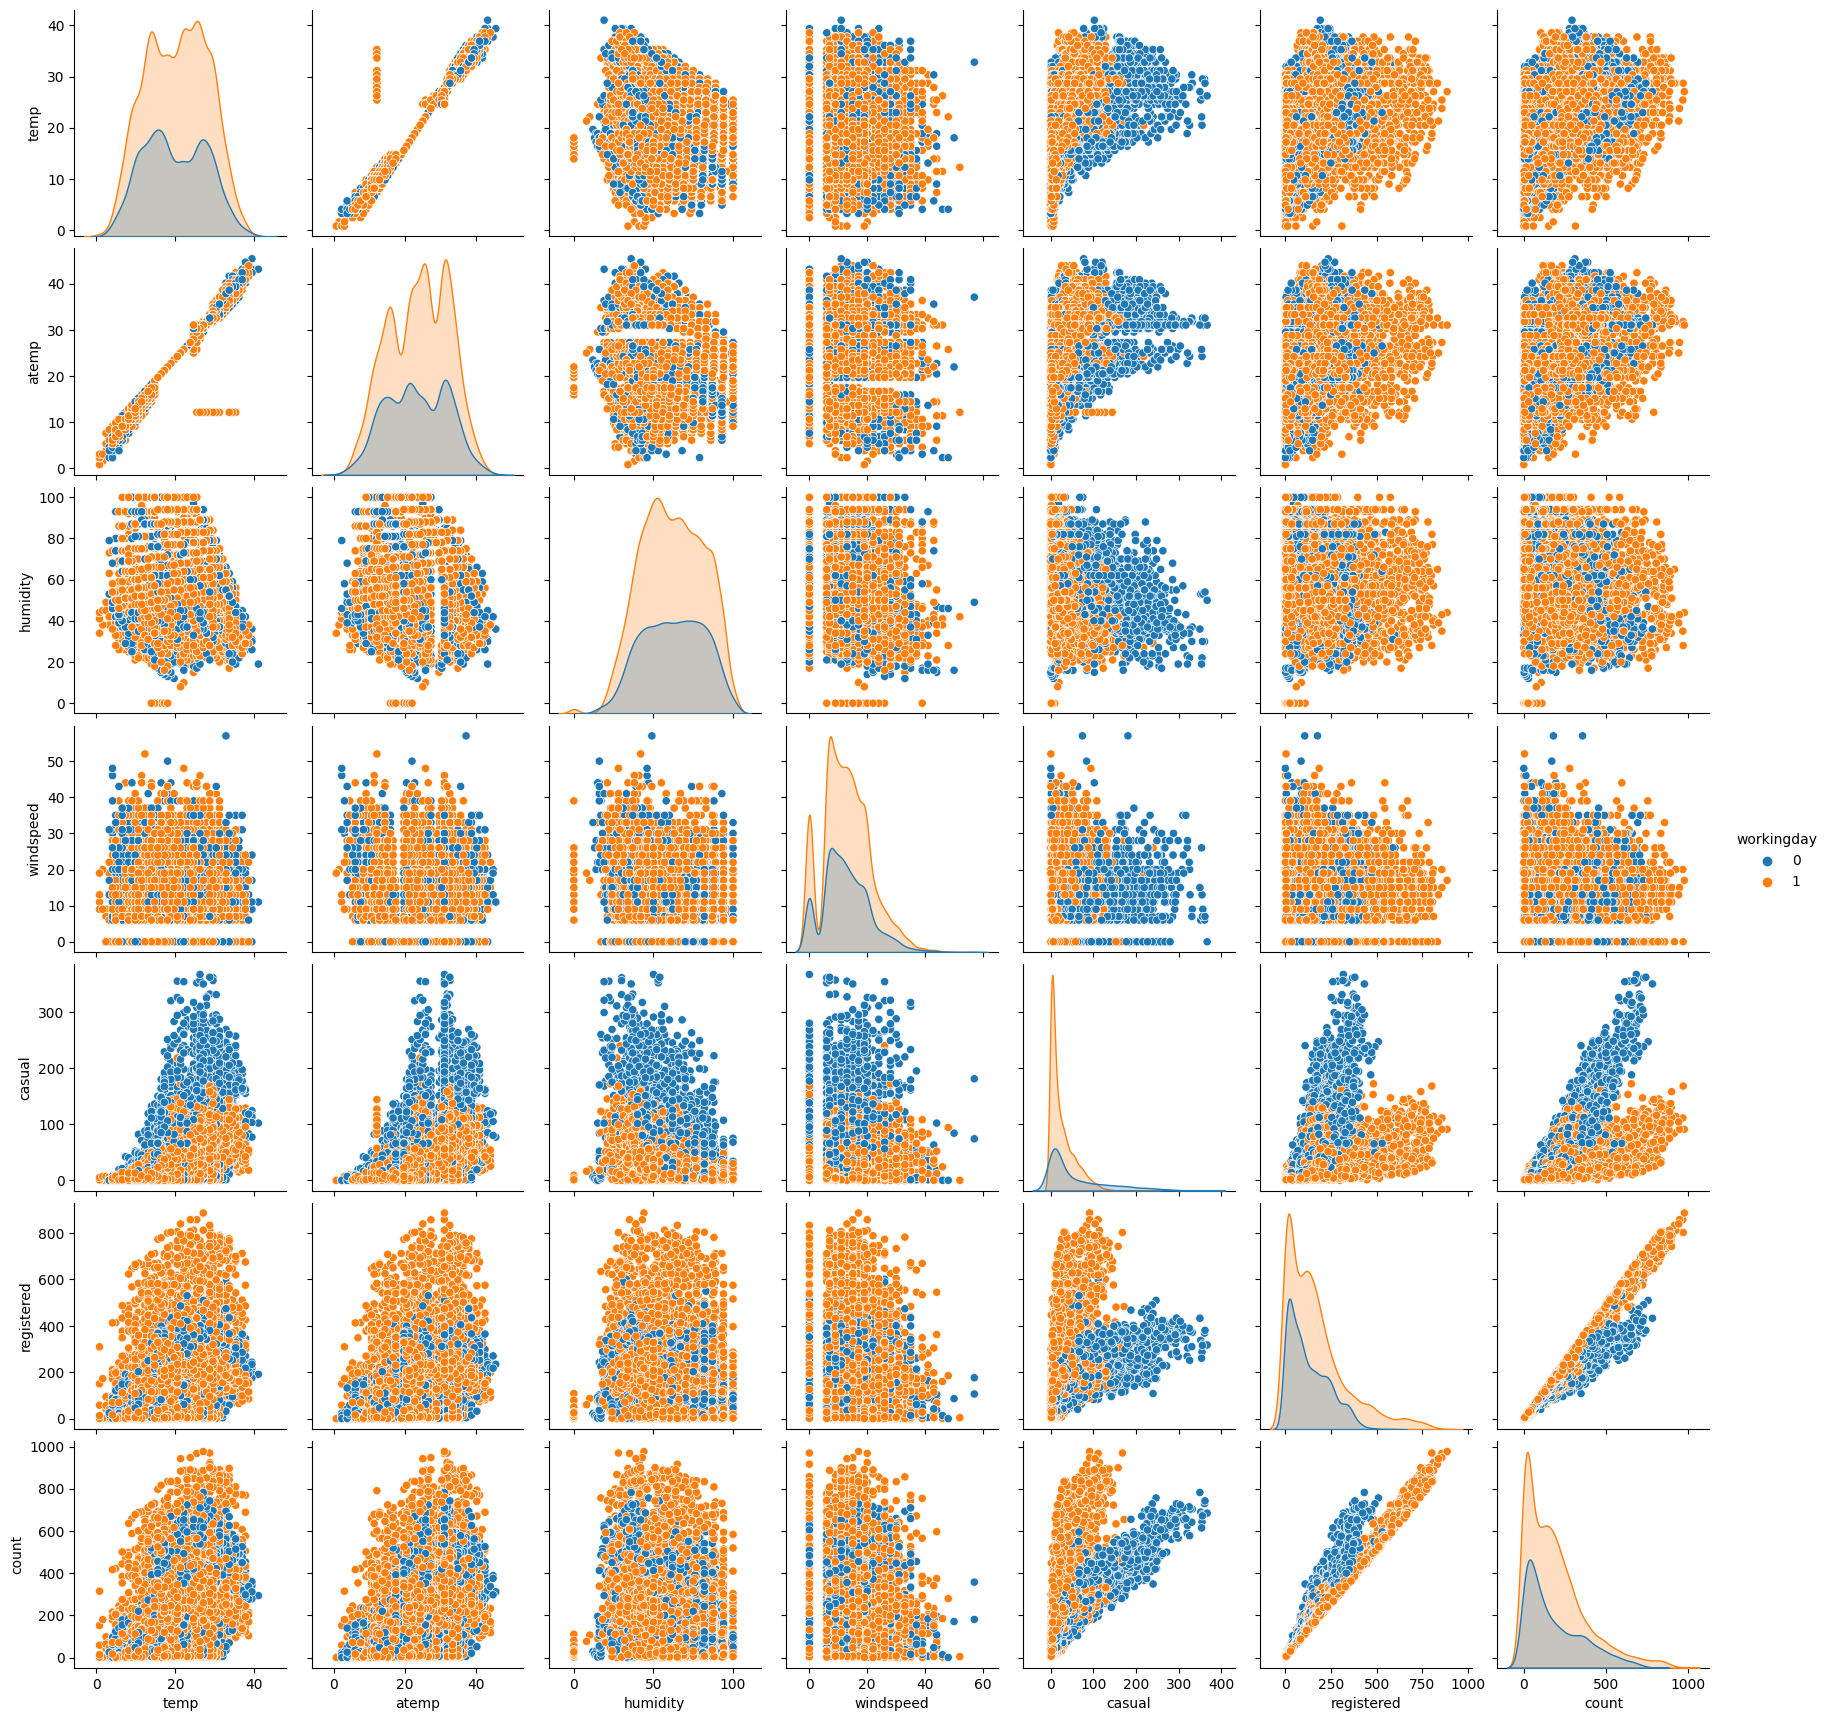

In [ ]:
sns.pairplot(yulu,hue ="workingday")

Observations:

*   more cycles are rented out on fall than other seasons
*   Cycle renting was more favorable during weather condition 1 compared to others
*  humidity and bike rentaks have negative coorelation.

*  casual users use bikes more on holidays


* Temperature is the highest in Season 3 ( when most cycles are rented).
* Count of Rented cycles are lower at lower and higher temperatures and maximizes around the average temperature range 15 degrees and 27 degrees.
*   Count of rented Cycle are highest around humidity levels of 40 to 80. beyond those values, count of rented cycles drop.
*   Cycles are rented less at temperatures lower than 10 degrees and rises with rise of temperature and again starts falling as temperature reaches 30 degrees.





# Hypothesis Testing






In [ ]:
def result(p_value):
  if p_value < 0.05:
    print("Reject Null Hypothesis")
  else:
    print("Failed to Reject Null Hypothesis")


# 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

In [ ]:
grp_1 = yulu.loc[yulu["workingday"]=="0","count"]
grp_2 = yulu.loc[yulu["workingday"]=="1","count"]

<Axes: xlabel='count', ylabel='Count'>

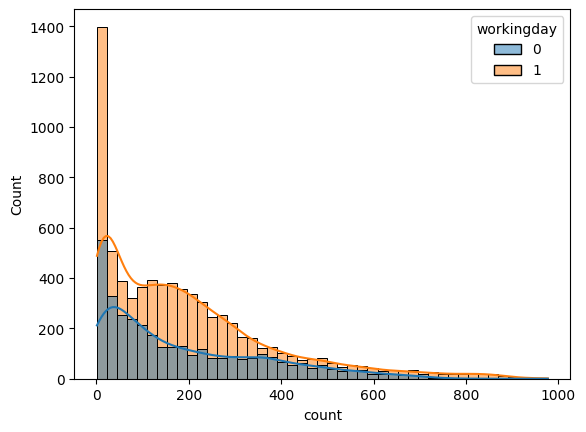

In [ ]:
# •	Visual analysis
sns.histplot(x=yulu["count"],kde=True,hue=yulu["workingday"])

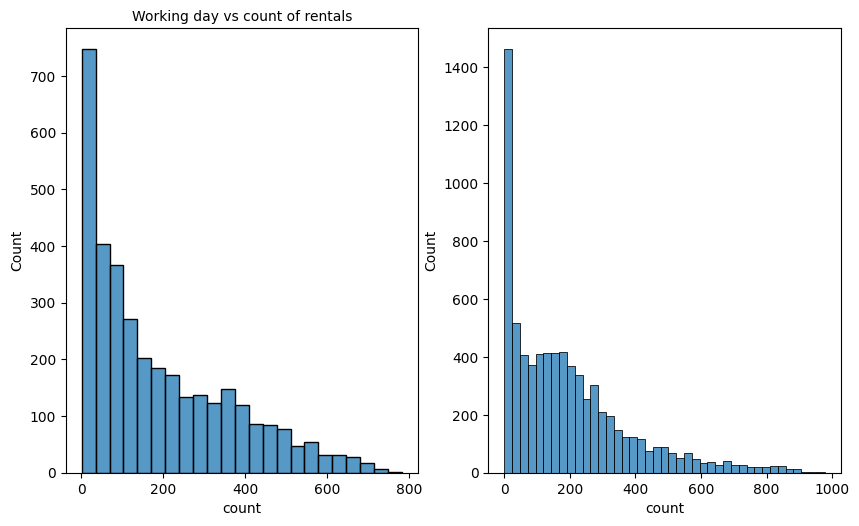

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.subplots_adjust(top=1)
sns.histplot(data= grp_1,ax= axis[0])
axis[0].set_title("Nonworking day vs count of rentals", pad=5, fontsize=10)
sns.histplot(data= grp_2,ax= axis[1])
axis[0].set_title("Working day vs count of rentals", pad=5, fontsize=10)
plt.show()

* Hypothesis formulation
  * Null Hypothesis ( H0 ) - number of electric cycles rented on working days and non working days are significantly same.
  * Alternate Hypothesis ( HA ) - number of electric cycles rented on working days and non working days are significantly different.

* Two sample t-test is considered as we are comparing two samples


* Checking for basic assumpitons for the t-test
    * The data are continuous:from the above histtogram we observed data is continous
    * The sample data have been randomly sampled from a population.
    * There is homogeneity of variance (i.e., the variability of the data in each group is similar):checked by levene's test
    *  The distribution is approximately normal: validate by shapiro wilk test




In [ ]:
# levene's test
# Null hypothesis : Samples have similar variances
# Alternate Hypothesis : samples have different variences
levene_stat, p_value =stats.levene(grp_1,grp_2)
result(p_value)


Failed to Reject Null Hypothesis


In [ ]:
# shapiro wilk test
# Null hypothesis : Sample is from the normal distributions
# Alternate Hypothesis: Sample is not from the normal distributions.
shapiro_stat, p_value =stats.shapiro(grp_1)
result(p_value)
shapiro_stat, p_value =stats.shapiro(grp_2)
result(p_value)

Reject Null Hypothesis
Reject Null Hypothesis


The data samples doesnot follow normal
distribution. Q-Q plots are constructed to verify this.

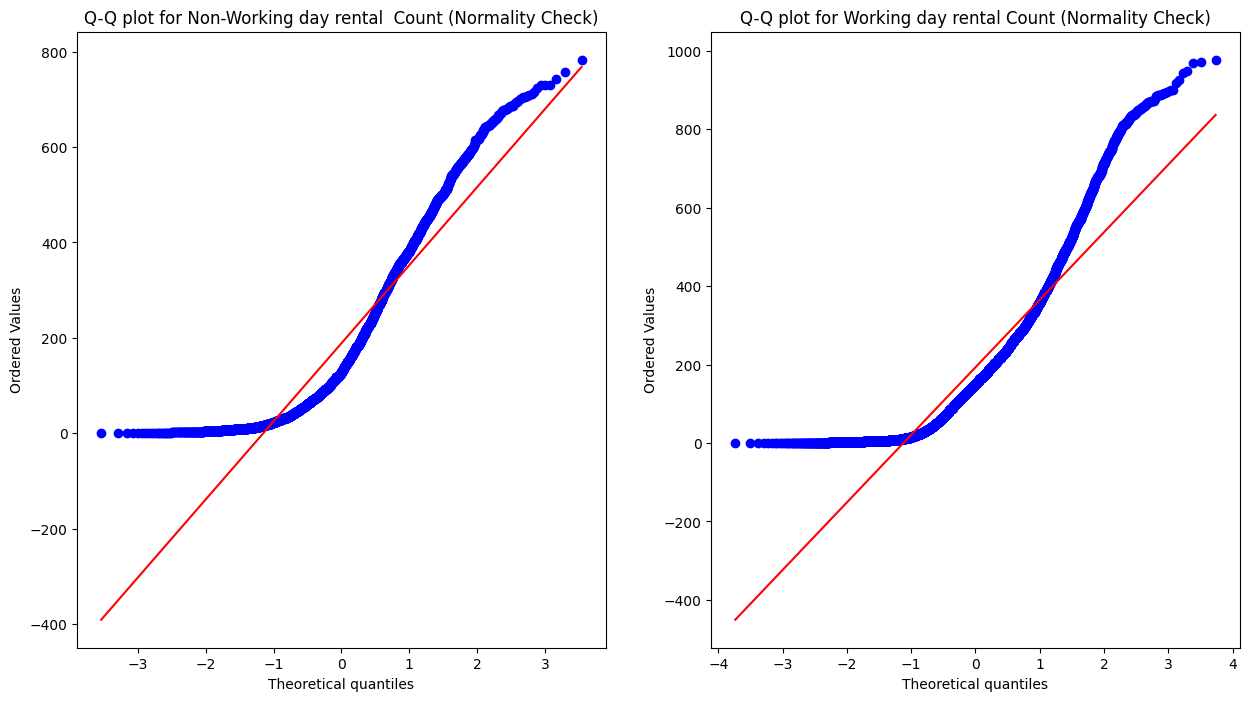

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
stats.probplot(grp_1, plot= plt, dist="norm")
plt.title('Q-Q plot for Non-Working day rental  Count (Normality Check)')
plt.subplot(1,2,2)
stats.probplot(grp_2, plot= plt, dist="norm")
plt.title('Q-Q plot for Working day rental Count (Normality Check)')
plt.show()

Though the samples dont follow normal distribution, here we are
taking to consideration that t-test is tolarent towards samples being not strictlynormaly distributed.

In [ ]:
# 2-sample t_stat test
t_stat, p_value = stats.ttest_ind(grp_1,grp_2)
print("p_value :",p_value )
result(p_value)

p_value : 0.22644804226361348
Failed to Reject Null Hypothesis


Conclusion based on the p-value : As p_value is larger than our significance level(0.05),we conclude that number of electric cycles rented on working days and non working days are significantly same. In other words, working and non working day alone dont stand any statistical significance on the count of rentals.

---



#	ANNOVA to check if No. of cycles rented is similar or different
1. Different weather

    1: Clear, Few clouds, partly cloudy, partly cloudy

    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [ ]:
grp_1 = yulu.loc[yulu["weather"]=="1","count"]
grp_2 = yulu.loc[yulu["weather"]=="2","count"]
grp_3 = yulu.loc[yulu["weather"]=="3","count"]
grp_4 = yulu.loc[yulu["weather"]=="4","count"]

In [ ]:
grp_4.nunique()

1

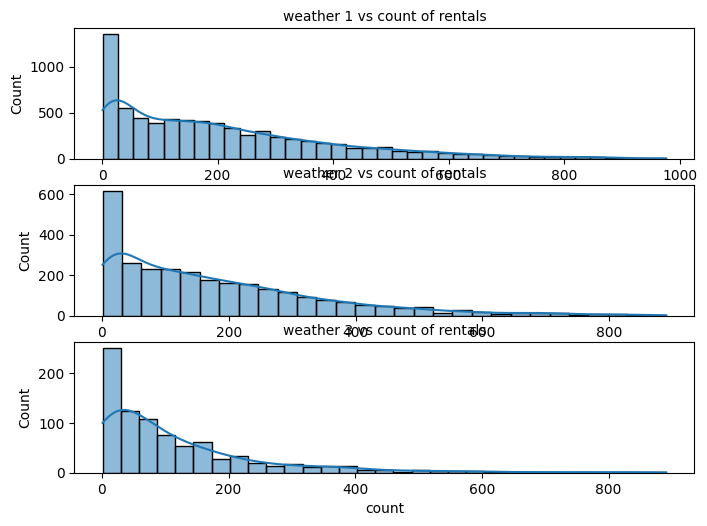

In [ ]:
fig, axis = plt.subplots(nrows=3, figsize=(8,5))
fig.subplots_adjust(top=1)
sns.histplot(data= grp_1,kde= True,ax= axis[0])
axis[0].set_title("weather 1 vs count of rentals", pad=5, fontsize=10)
sns.histplot(data= grp_2,kde= True,ax= axis[1])
axis[1].set_title("weather 2 vs count of rentals", pad=5, fontsize=10)
sns.histplot(data= grp_3,kde= True,ax= axis[2])
axis[2].set_title("weather 3 vs count of rentals", pad=5, fontsize=10)

plt.show()

* Hypothesis formulation
  * Null Hypothesis ( H0 ) - number of electric cycles rented on diferent weathers are same.
  * Alternate Hypothesis ( HA ) - number of electric cycles rented on diferent weathers are significantly different.

* ANNOVA is considered as we are comparing more than two samples

* Checking for basic assumpitons for the t-test
    * The data are independent
    * These distributions have the same variance:checked by levene's test
    *  The responses for each factor level have a normal population distribution: validate by shapiro wilk test

In [ ]:
# levene's test
# Null hypothesis : Samples have similar variances
# Alternate Hypothesis : samples have different variences
levene_stat, p_value =stats.levene(grp_1,grp_2,grp_3)
result(p_value)

Reject Null Hypothesis


In [ ]:
# shapiro wilk test
# Null hypothesis : Sample is from the normal distributions
# Alternate Hypothesis: Sample is not from the normal distributions.
shapiro_stat, p_value =stats.shapiro(grp_1)
result(p_value)
shapiro_stat, p_value =stats.shapiro(grp_2)
result(p_value)
shapiro_stat, p_value =stats.shapiro(grp_3)
result(p_value)

Reject Null Hypothesis
Reject Null Hypothesis
Reject Null Hypothesis


Kruskal-Wallis test is a non-parametric test and an alternative to One-Way ANNOVA. By non-parametric we mean, the data is not assumed to become from a particular distribution. The main objective of this test is used to determine whether there is a statistical difference between the medians of at least three independent groups.



In [ ]:
# Kruskal-Wallis test
# The null hypothesis: The median is the same for all the data groups.
# The alternative hypothesis: The median is not equal for all the data groups.
kruskal_stat, p_value =stats.kruskal(grp_1,grp_2,grp_3)
result(p_value)

Reject Null Hypothesis


Kruskal-Wallies suggestes there is a effect of weather in the count of the cycles rented.The varience of the samples are not similar.Also observed from histogram and shapiro test the samples dont follow normal distribution. In order to make the the sample set more compactable to ANNOVA text BOX-COX Transform is applied.

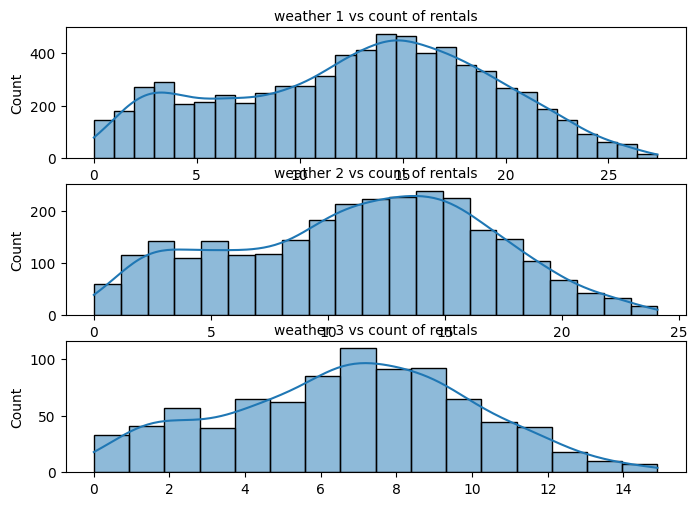

In [ ]:
# BOX-COX Transform

grp_1= stats.boxcox(grp_1)[0]
grp_2= stats.boxcox(grp_2)[0]
grp_3= stats.boxcox(grp_3)[0]

fig, axis = plt.subplots(nrows=3, figsize=(8,5))
fig.subplots_adjust(top=1)
sns.histplot(data= grp_1,kde= True,ax= axis[0])
axis[0].set_title("weather 1 vs count of rentals", pad=5, fontsize=10)
sns.histplot(data= grp_2,kde= True,ax= axis[1])
axis[1].set_title("weather 2 vs count of rentals", pad=5, fontsize=10)
sns.histplot(data= grp_3,kde= True,ax= axis[2])
axis[2].set_title("weather 3 vs count of rentals", pad=5, fontsize=10)

plt.show()

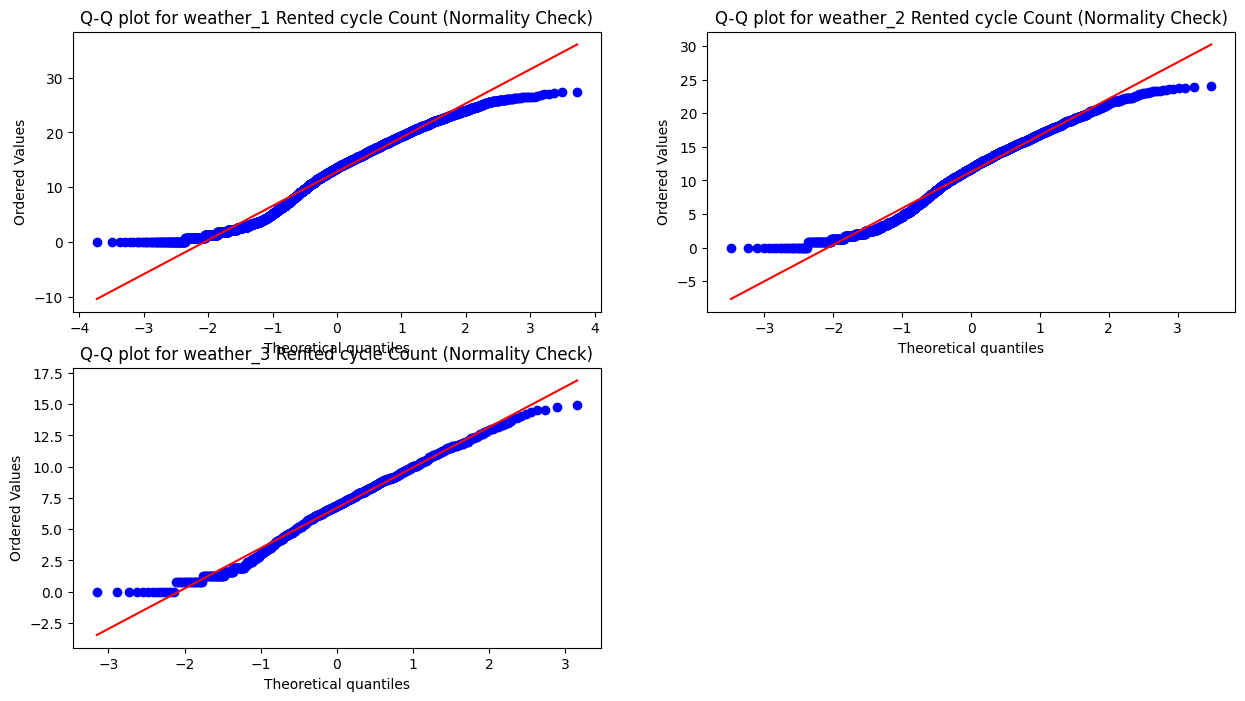

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
stats.probplot(grp_1, plot= plt, dist="norm")
plt.title('Q-Q plot for weather_1 Rented cycle Count (Normality Check)')
plt.subplot(2,2,2)
stats.probplot(grp_2, plot= plt, dist="norm")
plt.title('Q-Q plot for weather_2 Rented cycle Count (Normality Check)')
plt.subplot(2,2,3)
stats.probplot(grp_3, plot= plt, dist="norm")
plt.title('Q-Q plot for weather_3 Rented cycle Count (Normality Check)')
plt.show()



Though the end datapoints are not meeting the normal distribution, majority of the datapoints have aligned with normal distribution. It seems safe to apply ANNOVA test on this sample.

In [ ]:
# ANNOVA
f_stat, p_value = stats.f_oneway(grp_1,grp_2,grp_3)
print("p_value :",p_value )
result(p_value)

p_value : 3.4867243611236345e-181
Reject Null Hypothesis


Conclusion based on the p-value : As p_value is smaller than our significance level(0.05),we conclude that number of electric cycles rented on different weather are different. In other words, weather have statistical significance on the count of rentals.

---



2.ANNOVA test based on seasons

  1: spring

  2: summer

  3: fall

  4: winter

In [ ]:
grp_1 = yulu.loc[yulu["season"]=="1","count"]
grp_2 = yulu.loc[yulu["season"]=="2","count"]
grp_3 = yulu.loc[yulu["season"]=="3","count"]
grp_4 = yulu.loc[yulu["season"]=="4","count"]

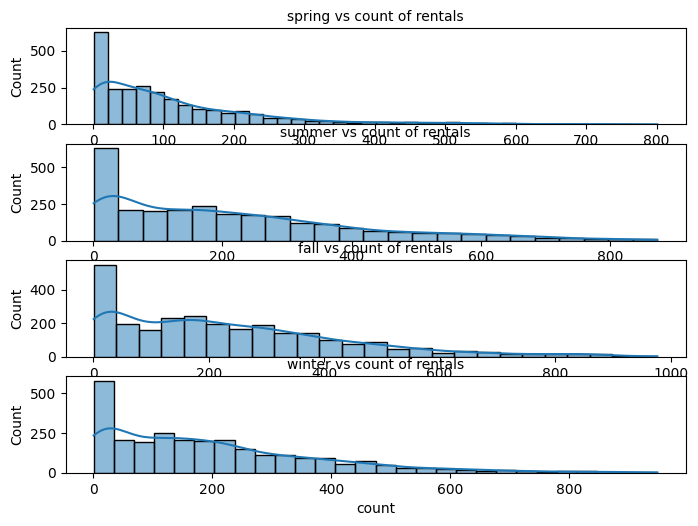

In [ ]:
fig, axis = plt.subplots(nrows=4, figsize=(8,5))
fig.subplots_adjust(top=1)
sns.histplot(data= grp_1,kde= True,ax= axis[0])
axis[0].set_title("spring vs count of rentals", pad=5, fontsize=10)
sns.histplot(data= grp_2,kde= True,ax= axis[1])
axis[1].set_title("summer vs count of rentals", pad=5, fontsize=10)
sns.histplot(data= grp_3,kde= True,ax= axis[2])
axis[2].set_title("fall vs count of rentals", pad=5, fontsize=10)
sns.histplot(data= grp_4,kde= True,ax= axis[3])
axis[3].set_title("winter vs count of rentals", pad=5, fontsize=10)
plt.show()

* Hypothesis formulation
  * Null Hypothesis ( H0 ) - number of electric cycles rented on diferent seasons are same.
  * Alternate Hypothesis ( HA ) - number of electric cycles rented on diferent seasons are significantly different.

* ANNOVA is considered as we are comparing more than two samples

* Checking for basic assumpitons for the t-test
    * The data are independent
    * These distributions have the same variance:checked by levene's test
    *  The responses for each factor level have a normal population distribution: validate by shapiro wilk test

In [ ]:
# levene's test
# Null hypothesis : Samples have similar variances
# Alternate Hypothesis : samples have different variences
levene_stat, p_value =stats.levene(grp_1,grp_2,grp_3,grp_4)
result(p_value)

Reject Null Hypothesis


In [ ]:
# shapiro wilk test
# Null hypothesis : Sample is from the normal distributions
# Alternate Hypothesis: Sample is not from the normal distributions.
shapiro_stat, p_value =stats.shapiro(grp_1)
result(p_value)
shapiro_stat, p_value =stats.shapiro(grp_2)
result(p_value)
shapiro_stat, p_value =stats.shapiro(grp_3)
result(p_value)
shapiro_stat, p_value =stats.shapiro(grp_4)
result(p_value)

Reject Null Hypothesis
Reject Null Hypothesis
Reject Null Hypothesis
Reject Null Hypothesis


Going ahed and checking with non parametric Kruskal_Wallis test

In [ ]:
# Kruskal-Wallis test
# The null hypothesis: The median is the same for all the data groups.
# The alternative hypothesis: The median is not equal for all the data groups.
kruskal_stat, p_value =stats.kruskal(grp_1,grp_2,grp_3,grp_4)
result(p_value)

Reject Null Hypothesis


Kruskal-Wallies suggestes there is a effect of season in the count of the cycles rented. The varience of the samples are not similar.Also observed from histogram and shapiro test the samples dont follow normal distribution. In order to make the the sample set more compactable to ANNOVA text BOX-COX Transform is applied.

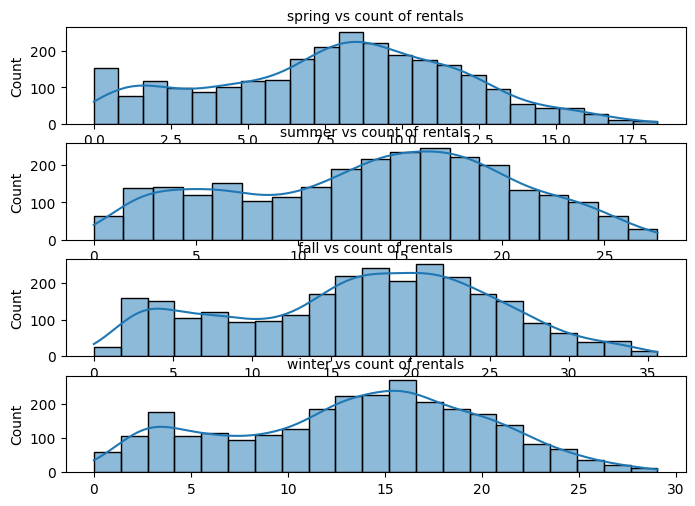

In [ ]:
# BOX-COX Transform

grp_1= stats.boxcox(grp_1)[0]
grp_2= stats.boxcox(grp_2)[0]
grp_3= stats.boxcox(grp_3)[0]
grp_4= stats.boxcox(grp_4)[0]

fig, axis = plt.subplots(nrows=4, figsize=(8,5))
fig.subplots_adjust(top=1)
sns.histplot(data= grp_1,kde= True,ax= axis[0])
axis[0].set_title("spring vs count of rentals", pad=5, fontsize=10)
sns.histplot(data= grp_2,kde= True,ax= axis[1])
axis[1].set_title("summer vs count of rentals", pad=5, fontsize=10)
sns.histplot(data= grp_3,kde= True,ax= axis[2])
axis[2].set_title("fall vs count of rentals", pad=5, fontsize=10)
sns.histplot(data= grp_4,kde= True,ax= axis[3])
axis[3].set_title("winter vs count of rentals", pad=5, fontsize=10)
plt.show()

Eventhough perfect normal distribution was not attained , ANNOVA test is applied as samples are tending towards normal distribution.


In [ ]:
# ANNOVA
f_stat, p_value = stats.f_oneway(grp_1,grp_2,grp_3,grp_4)
print("p_value :",p_value )
result(p_value)

p_value : 0.0
Reject Null Hypothesis


Conclusion based on the p-value : As p_value is smaller than our significance level(0.05),we conclude that number of electric cycles rented on different seasons are different. In other words, seasons have statistical significance on the count of rentals.

---



# Chi-square test to check if Weather is dependent on the season

In [ ]:
pd.crosstab(yulu['weather'],yulu['season'])

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


* Hypothesis formulation
  * Null Hypothesis ( H0 ) - The weather and seosons are not retaled in the population; The propotion of different weathers are same for all seasons
  * Alternate Hypothesis ( HA ) - The weather and seosons are retaled in the population; The propotion of different weathers are different for diferent seasons

* chi-squared test is considered as we are comparing than two categorical variable freequencies

* Checking for basic assumpitons for the chi-squared test
    * Both variables are categorical.
    * All observations are independent and mutually exclusive.
    *  Expected value of cells should be 5 or greater in at least 80% of cells

As weather type 4 have only one entry and it doesnt satisfy assumption of chi- squared test.removing that entry from analysis

In [ ]:
yulu_weather = yulu.loc[yulu["weather"]!= "4","weather"]
weather_season = pd.crosstab(yulu_weather,yulu['season'])
weather_season

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225


In [ ]:
chi_stat,p_value,df,exp_value = stats.chi2_contingency(weather_season)
print("p_value :",p_value )
result(p_value)

p_value : 2.8260014509929403e-08
Reject Null Hypothesis


Conclusion based on the p-value : As p value is considerably smaller than the significance level, we reject null hypothesis. Weather and seasons are co-related.The propotion of different weathers are different for diferent seasons.

---



# Insights

*   Season - Count of rented bikes are maximum in fall and minimum in spring
*   Weather - Count of rented bikes are maximum in weather 1 and only single usage in weather 4.
*   Temperature - Count of rented bikes are very high at moderate temperatures and lowers with fall in temperature.
*   Registered cycles rented on working days are higher than casual cycles rented on working days.
*   Humidity, windspeed, temperature and weather are correlated with season and impacts the count of cycles rented.humidity have negative coorelation with cycle rent count
*   Cycles rented on working and non-working days are similar in number.
*  By using 2- sample T-Test we conclude that number of electric cycles rented on working days and non working days are significantly same. In other words, working and non working day alone dont stand any statistical significance on the count of rentals.

*   With ANNOVA we conclude  season, weather have statistical significance on the count of rentals
*   With chi sqared test we conclude  Weather and seasons are co-related.The propotion of different weathers are different for diferent seasons.






# Reccomendations


*   cycle rented is very low during season 1. Yulu can rollout some challenges during this season, like New year goals on fitness and roll out exciting prizes for people participating in this season.
*  Yulu can offer reduced pricing for people renting in these weather conditions (weather 2 & 3) where rental is low.
*  The count of bikes rented on holidays are significantly lower than on non-holidays. Yulu can set up bike centers near entertainment hotspots, like malls and amusemennt parks to hike up its rental count on weekends and holidays.
*  Yulu can introduce exclusive benifits for registered users to get more users to register, which can pull up the amount of cycles rented per hour.
* Yulu can offer customised referral discounts based on the
bikes they choose in their first trial (Yulu Miracle, Yulu Dex, Yulu Move).
* The counted vehicle demand on non-working and holiday days is very low. Yulu can introduce promotional offers on holidays and non-holidays or can arrange health competitions on Yulu Move bikes.
*  In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.







